<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading the file and store it in a DataFrame named "products_df".
products_df = pd.read_csv('dataset\\products_data.csv', sep=',')

In [3]:
print(products_df)

                                       Name Current Price Previous Price  \
0                          English Cucumber          1.99           1.99   
1                               Green Onion          1.29           1.29   
2           Bi-Colour Corn, Corn on the Cob          0.99           0.99   
3                     Romaine Heart, 3 Pack          6.00           6.00   
4                           Red Peppers              2.38           2.38   
...                                     ...           ...            ...   
17254                    Beef Sausage Rolls          8.79           8.79   
17255  Creamy Chicken and Vegetable Pot Pie          8.00           8.00   
17256                     Quiche Florentine          8.00           8.00   
17257                             Green Tea          2.29           2.29   
17258             Hard-boiled Eggs, Omega-3          1.29           1.29   

       Price Per Each          Category      Product ID  \
0           $1.99/1ea  Fresh

In [4]:
# Check the data types
products_df.dtypes

Name              object
Current Price     object
Previous Price    object
Price Per Each    object
Category          object
Product ID        object
Product URL       object
Amount            object
Units             object
dtype: object

In [5]:
# Convert the 'Current Price' and 'Previous Price' column from 'object' to 'float'
products_df['Current Price'] = pd.to_numeric(products_df['Current Price'], errors='coerce')
products_df['Previous Price'] = pd.to_numeric(products_df['Previous Price'], errors='coerce')

# The 'errors' parameter is set to 'coerce' to handle any non-numeric values by converting them to NaN.


In [6]:
products_df[13887:13897]

,Name,Current Price,Previous Price,Price Per Each,Category,Product ID,Product URL,Amount,Units
13887,Quick-N-Easy Beef & Pork Meatloaf With Barbequ...,5.99,10.49,$0.86/100g,"Meals, Entrees & Sides",21529587_EA,https://www.realcanadiansuperstore.ca/quick-n-...,700,g
13888,Quick-N-Easy Beef Meatballs In Marinara Sauce,5.99,10.49,$0.86/100g,"Meals, Entrees & Sides",21529576_EA,https://www.realcanadiansuperstore.ca/quick-n-...,700,g
13889,"Not Burger Plant-Based Patties, 4 pack",11.99,11.99,$2.65/100g,"Meals, Entrees & Sides",21455624_EA,https://www.realcanadiansuperstore.ca/not-burg...,452,g
13890,"Fit Bowls, Prime Rib Steak Fajita Bowl",1.77,6.79,$0.52/100g,"Meals, Entrees & Sides",21080255_EA,https://www.realcanadiansuperstore.ca/fit-bowl...,340,g
13891,Sweet & Tangy Pulled Pork with Spicy Sweet Pot...,5.29,5.29,$1.87/100g,"Meals, Entrees & Sides",21085513_EA,https://www.realcanadiansuperstore.ca/sweet-ta...,283,g
13892,"Vegetable, Pork, and Sweet Corn Dumplings",4.88,4.88,$0.86/100g,"Meals, Entrees & Sides",20660932_EA,https://www.realcanadiansuperstore.ca/vegetabl...,567,g
13893,Chicken Teriyaki,5.00,5.00,$1.77/100g,"Meals, Entrees & Sides",21041002_EA,https://www.realcanadiansuperstore.ca/chicken-...,283,g
13894,Tastie Vegetable Spring Roll,3.29,3.29,$1.61/100g,"Meals, Entrees & Sides",20995597_EA,https://www.realcanadiansuperstore.ca/tastie-v...,204,g
13895,KD Deluxe Four Cheese Macaroni & Cheese Frozen...,5.29,5.29,$1.56/100g,"Meals, Entrees & Sides",21552618_EA,https://www.realcanadiansuperstore.ca/kd-delux...,340,g
13896,XL Buffalo-Style Chicken Mac ‘n Cheese,6.79,6.79,$1.71/100g,"Meals, Entrees & Sides",21219527_EA,https://www.realcanadiansuperstore.ca/xl-buffa...,397,g


In [7]:
# Check if prices are different between the "Current Price" and "Previous Price".
prices = products_df['Current Price'] != products_df['Previous Price']

# Filter the DataFrame to get only the rows where prices are different
price_difference = products_df[prices]

In [8]:
price_difference

,Name,Current Price,Previous Price,Price Per Each,Category,Product ID,Product URL,Amount,Units
11,Zucchini,0.92,1.23,$3.28/1kg,Fresh Vegetables,20426596001_KG,https://www.realcanadiansuperstore.ca/zucchini...,1,ea
15,Roma Tomatoes,0.39,0.53,$3.28/1kg,Fresh Vegetables,20143381001_KG,https://www.realcanadiansuperstore.ca/roma-tom...,1,ea
16,Broccoli Crowns,1.65,3.34,$4.34/1kg,Fresh Vegetables,20026161001_KG,https://www.realcanadiansuperstore.ca/broccoli...,1,ea
18,Ginger,1.38,1.48,$6.57/1kg,Fresh Vegetables,20179038001_KG,https://www.realcanadiansuperstore.ca/ginger/p...,1,ea
20,Naturally Imperfect Mixed Sweet Peppers 2.5lb Bag,5.00,6.00,$0.45/100g,Fresh Vegetables,20921434001_EA,https://www.realcanadiansuperstore.ca/naturall...,1.113,kg
...,...,...,...,...,...,...,...,...,...
17056,"Rainbow Cheese Tortellini, Large",6.99,10.49,$0.70/100g,Fresh Pasta & Sauce,21302616_EA,https://www.realcanadiansuperstore.ca/rainbow-...,1000,g
17075,"Tortellini, Beef",6.99,8.00,$0.70/100g,Fresh Pasta & Sauce,20298385_EA,https://www.realcanadiansuperstore.ca/tortelli...,1,kg
17095,Linguine,6.99,8.00,$0.70/100g,Fresh Pasta & Sauce,20097415_EA,https://www.realcanadiansuperstore.ca/linguine...,1,kg
17104,"Ravioli, Cheese & Spinach",6.99,8.00,$0.70/100g,Fresh Pasta & Sauce,20025156_EA,https://www.realcanadiansuperstore.ca/ravioli-...,1,kg


In [9]:
# Check if we have a nice discount
discount = products_df['Current Price'] < products_df['Previous Price']

# Filter the DataFrame to get only the rows where we have a discount
price_discount = products_df[discount]

In [10]:
price_discount

,Name,Current Price,Previous Price,Price Per Each,Category,Product ID,Product URL,Amount,Units
11,Zucchini,0.92,1.23,$3.28/1kg,Fresh Vegetables,20426596001_KG,https://www.realcanadiansuperstore.ca/zucchini...,1,ea
15,Roma Tomatoes,0.39,0.53,$3.28/1kg,Fresh Vegetables,20143381001_KG,https://www.realcanadiansuperstore.ca/roma-tom...,1,ea
16,Broccoli Crowns,1.65,3.34,$4.34/1kg,Fresh Vegetables,20026161001_KG,https://www.realcanadiansuperstore.ca/broccoli...,1,ea
18,Ginger,1.38,1.48,$6.57/1kg,Fresh Vegetables,20179038001_KG,https://www.realcanadiansuperstore.ca/ginger/p...,1,ea
20,Naturally Imperfect Mixed Sweet Peppers 2.5lb Bag,5.00,6.00,$0.45/100g,Fresh Vegetables,20921434001_EA,https://www.realcanadiansuperstore.ca/naturall...,1.113,kg
...,...,...,...,...,...,...,...,...,...
17056,"Rainbow Cheese Tortellini, Large",6.99,10.49,$0.70/100g,Fresh Pasta & Sauce,21302616_EA,https://www.realcanadiansuperstore.ca/rainbow-...,1000,g
17075,"Tortellini, Beef",6.99,8.00,$0.70/100g,Fresh Pasta & Sauce,20298385_EA,https://www.realcanadiansuperstore.ca/tortelli...,1,kg
17095,Linguine,6.99,8.00,$0.70/100g,Fresh Pasta & Sauce,20097415_EA,https://www.realcanadiansuperstore.ca/linguine...,1,kg
17104,"Ravioli, Cheese & Spinach",6.99,8.00,$0.70/100g,Fresh Pasta & Sauce,20025156_EA,https://www.realcanadiansuperstore.ca/ravioli-...,1,kg


In [11]:
# Check how many discounts we have using "length" function.
len(price_discount)

1180

In [12]:
# Looking for price raisings
price_increase = products_df['Current Price'] > products_df['Previous Price']
price_raising = products_df[price_increase]

In [13]:
# Check how many price increases are in the dataset using "shape" attribute.
price_raising.shape[0]

0

In [14]:
price_raising

,Name,Current Price,Previous Price,Price Per Each,Category,Product ID,Product URL,Amount,Units


In [15]:
# Sort DataFrame by "Price" in ascending order
products_df.sort_values(by='Current Price').head()

,Name,Current Price,Previous Price,Price Per Each,Category,Product ID,Product URL,Amount,Units
16618,White Bread,0.01,2.99,$0.00/100g,Bread,21375835_EA,https://www.realcanadiansuperstore.ca/white-br...,450,g
405,Blue Plums,0.18,0.26,$4.39/1kg,Fresh Fruits,20335481001_KG,https://www.realcanadiansuperstore.ca/blue-plu...,1,ea
159,Hot Finger Peppers,0.18,0.18,$15.41/1kg,Fresh Vegetables,20083681001_KG,https://www.realcanadiansuperstore.ca/hot-fing...,1,ea
644,Walnuts,0.27,0.27,$0.55/100g,Dried Fruits & Nuts,20123893001_KG,https://www.realcanadiansuperstore.ca/walnuts/...,1,ea
152,White Mushrooms,0.33,0.33,$1.10/100g,Fresh Vegetables,20321225001_KG,https://www.realcanadiansuperstore.ca/white-mu...,1,ea


In [16]:
# Sort DataFrame by "Price" in descending order
products_df.sort_values(by='Current Price', ascending=False)

,Name,Current Price,Previous Price,Price Per Each,Category,Product ID,Product URL,Amount,Units
8417,"Whole Pink Salmon, Previously Frozen",809.99,809.99,$999.99/1kg,Salmon,21347725_KG,https://www.realcanadiansuperstore.ca/whole-pi...,1,ea
7787,Frozen Turkey 5-7kg,600.36,600.36,$100.06/1kg,Chicken & Turkey,20118435_KG,https://www.realcanadiansuperstore.ca/frozen-t...,1,ea
8402,"Coho Steaks, Previously Frozen",394.23,394.23,$999.99/1kg,Salmon,20964475_KG,https://www.realcanadiansuperstore.ca/coho-ste...,1,ea
7877,Beef Tenderloin,213.15,213.15,$66.12/1kg,Beef,20771237_KG,https://www.realcanadiansuperstore.ca/beef-ten...,1,ea
13508,"Frozen Utility Turkey, 11kg and up",101.64,101.64,$6.59/1kg,Frozen Meat & Seafood,20035576_KG,https://www.realcanadiansuperstore.ca/frozen-u...,1,ea
...,...,...,...,...,...,...,...,...,...
644,Walnuts,0.27,0.27,$0.55/100g,Dried Fruits & Nuts,20123893001_KG,https://www.realcanadiansuperstore.ca/walnuts/...,1,ea
159,Hot Finger Peppers,0.18,0.18,$15.41/1kg,Fresh Vegetables,20083681001_KG,https://www.realcanadiansuperstore.ca/hot-fing...,1,ea
405,Blue Plums,0.18,0.26,$4.39/1kg,Fresh Fruits,20335481001_KG,https://www.realcanadiansuperstore.ca/blue-plu...,1,ea
16618,White Bread,0.01,2.99,$0.00/100g,Bread,21375835_EA,https://www.realcanadiansuperstore.ca/white-br...,450,g


In [19]:
# Calculate the median of the 'Current Prices'
median_price = products_df['Current Price'].median()
print("Median Price:", median_price)

Median Price: 4.99


In [21]:
# Group by "Category" and calculate mean and count of "Price" within each group
grouped_df = products_df.groupby('Category')['Previous Price'].agg(['mean', 'count'])

grouped_df

,mean,count
Category,,
"Dips, Spreads & Antipasto",5.824667,90
Appetizers & Snacks,10.371053,76
"Bacon, Sausages & Hot Dogs",9.032880,191
"Bagels, Buns & Rolls",4.390526,95
Bakery,6.568462,13
...,...,...
Tea & Hot Drinks,6.006753,271
Vegan & Vegetarian,5.359639,83
Water,4.960714,196


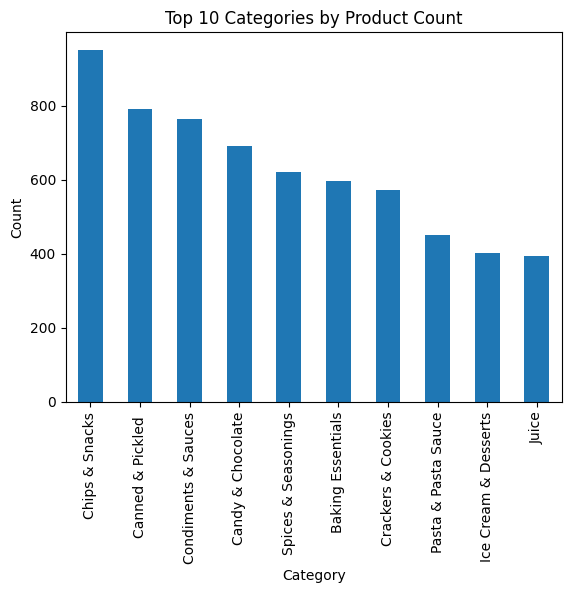

In [26]:
# Group by "Category" and calculate the count of products in each category
category_counts = products_df['Category'].value_counts()

# Sort the categories by counts in descending order
sorted_categories = category_counts.sort_values(ascending=False)

# Select the top 10 categories
top_10_categories = sorted_categories.head(10)

# Create a bar chart for the top 10 categories
top_10_categories.plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Categories by Product Count')

plt.show()